In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import csv

In [2]:
liverdata = pd.read_csv('DATA/Indian Liver Patient Dataset (ILPD).csv')

In [3]:
liverdata.columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset']

In [4]:
liverdata["Albumin_and_Globulin_Ratio"].fillna("0.94", inplace = True)
liverdata['Gender']=liverdata.Gender.map(dict(Female=0,Male=1))
liverdata

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
1,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
2,58,1,1.0,0.4,182,14,20,6.8,3.4,1,1
3,72,1,3.9,2.0,195,27,59,7.3,2.4,0.4,1
4,46,1,1.8,0.7,208,19,14,7.6,4.4,1.3,1
5,26,0,0.9,0.2,154,16,12,7.0,3.5,1,1
6,29,0,0.9,0.3,202,14,11,6.7,3.6,1.1,1
7,17,1,0.9,0.3,202,22,19,7.4,4.1,1.2,2
8,55,1,0.7,0.2,290,53,58,6.8,3.4,1,1
9,57,1,0.6,0.1,210,51,59,5.9,2.7,0.8,1


Number of patients diagnosed with liver disease:  415
Number of patients not diagnosed with liver disease:  167


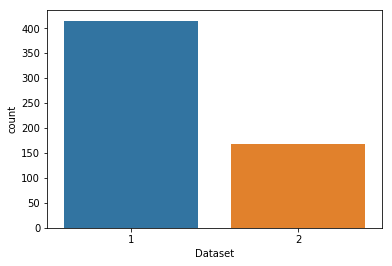

In [5]:
sns.countplot(data=liverdata, x = 'Dataset', label='Count')

LD,NLD = liverdata['Dataset'].value_counts()
print('Number of patients diagnosed with liver disease: ',LD)
print('Number of patients not diagnosed with liver disease: ',NLD)

In [6]:
liverdata_sex = pd.get_dummies(liverdata['Gender'])
liverdata_new = pd.concat([liverdata, liverdata_sex], axis=1)
liverdata_gender = liverdata_new.drop(labels=['Gender'],axis=1 )
liverdata_gender.columns = ['Age', 'Total_Bilirubin', 'Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','1','0','Dataset']
liverdata_gender.head(10)

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,1,0,Dataset
0,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0,1
1,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0,1
2,58,1.0,0.4,182,14,20,6.8,3.4,1,1,0,1
3,72,3.9,2.0,195,27,59,7.3,2.4,0.4,1,0,1
4,46,1.8,0.7,208,19,14,7.6,4.4,1.3,1,0,1
5,26,0.9,0.2,154,16,12,7.0,3.5,1,1,1,0
6,29,0.9,0.3,202,14,11,6.7,3.6,1.1,1,1,0
7,17,0.9,0.3,202,22,19,7.4,4.1,1.2,2,0,1
8,55,0.7,0.2,290,53,58,6.8,3.4,1,1,0,1
9,57,0.6,0.1,210,51,59,5.9,2.7,0.8,1,0,1


In [7]:
X = liverdata_gender.drop('Dataset',axis=1)
Y = liverdata_gender['Dataset']
# split data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 99)


#scaling of the data using min-max scaler
from sklearn.preprocessing import StandardScaler
table=pd.DataFrame(X_train)
table.to_csv('X_train.csv')
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

G:\Anacoda\envs\nlp_course\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
G:\Anacoda\envs\nlp_course\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
G:\Anacoda\envs\nlp_course\lib\site-packages\ipykernel_launcher.py:16: DataConversionWarning: Data with input dtype uint8, int64, float64, object were all converted to float64 by StandardScaler.
  app.launch_new_instance()


In [8]:
params_grid = [{'kernel': ['linear'], 'C': [1, 10, 100, 1000]},
               {'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

# Performing CV to tune parameters for best SVM fit 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, Y_train)

svm_model.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}, {'kernel': ['rbf'], 'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [10]:
Y_predict = svm_model.predict(X_test)
cm = confusion_matrix(Y_test,Y_predict)

In [11]:
cm = np.array(confusion_matrix(Y_test,Y_predict,labels=[1,0]))

confusion=pd.DataFrame(cm, index=['is_Liver_Disease', 'No_Liver_Disease'], columns=['Prediction_of_Disease', 'Prediction_of_Healthy']) 
confusion

,Prediction_of_Disease,Prediction_of_Healthy
is_Liver_Disease,141,0
No_Liver_Disease,0,34


In [12]:
print(classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00       141

   micro avg       1.00      1.00      1.00       175
   macro avg       1.00      1.00      1.00       175
weighted avg       1.00      1.00      1.00       175



In [13]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
accuracy = accuracy_score(Y_test,Y_predict)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [14]:
import joblib

# Save the model as a pickle in a file
joblib.dump(svm_model, 'svm.pkl')

['svm.pkl']